In [1]:
import numpy as np
import pandas as pd
from datetime import time
pd.set_option('html', False)

%matplotlib inline

In [2]:
df = pd.read_csv("/Users/jkatzsamuels/Desktop/dssg/Building_Violations_sample_50000.csv")
df

/Users/jkatzsamuels/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


       Unnamed: 0       ID VIOLATION LAST MODIFIED DATE VIOLATION DATE  \
0               0  5063843                   05/21/2015     05/21/2015   
1               1  5063990                   05/21/2015     05/21/2015   
2               2  5064022                   05/21/2015     05/21/2015   
3               3  5064019                   05/21/2015     05/21/2015   
4               4  5064139                   05/21/2015     05/21/2015   
5               5  5064153                   05/21/2015     05/21/2015   
6               6  5064141                   05/21/2015     05/21/2015   
7               7  5064257                   05/21/2015     05/21/2015   
8               8  5064728                   05/21/2015     05/21/2015   
9               9  5064742                   05/21/2015     05/21/2015   
10             10  5064812                   05/21/2015     05/21/2015   
11             11  5064815                   05/21/2015     05/21/2015   
12             12  5063772            

In [3]:
#get rid of useless columns
del df['Unnamed: 0']
del df['SSA']
del df['VIOLATION LAST MODIFIED DATE']
del df['VIOLATION STATUS DATE']


In [4]:
import re

def spaces_to_snake(column_name):
    s = re.sub(r"\s+", '_', column_name)
    return s.lower()

df.columns = [spaces_to_snake(col) for col in df.columns]

df.columns

Index([u'id', u'violation_date', u'violation_code', u'violation_status',
       u'violation_description', u'violation_location',
       u'violation_inspector_comments', u'violation_ordinance',
       u'inspector_id', u'inspection_number', u'inspection_status',
       u'inspection_waived', u'inspection_category', u'department_bureau',
       u'address', u'property_group', u'latitude', u'longitude', u'location'],
      dtype='object')

In [5]:
#convert from object to datetime data type
df.index = pd.to_datetime(df.pop('violation_date'))

df.head()

                     id violation_code violation_status  \
violation_date                                            
2015-05-21      5063843       CN065014             OPEN   
2015-05-21      5063990       CN044013             OPEN   
2015-05-21      5064022       CN104035             OPEN   
2015-05-21      5064019       CN196029             OPEN   
2015-05-21      5064139       CN104015             OPEN   

                         violation_description             violation_location  \
violation_date                                                                  
2015-05-21                      REPAIR LINTELS                 OTHER   :    :   
2015-05-21      PIPE OPENING W/NONCOMBUST MATL  OTHER   :    :MULTIPLE FLOORS   
2015-05-21                     MAINTAIN WINDOW                 OTHER   :    :   
2015-05-21          POST OWNER/MANAGERS NAME/#                 OTHER   :    :   
2015-05-21       REPLCE WINDOW PANES, PLEXGLAS                 OTHER   :    :   

                  

In [6]:
#drop observations with important values missing
df=df.dropna(how='any', subset = ['location', 'longitude', 'latitude', 'property_group', 'inspection_status'])
df.shape

(49952, 18)

##Time Series Operations

In [7]:
#examine data on specific day
df.violation_status['2009-10-15']

violation_date
2009-10-15        OPEN
2009-10-15        OPEN
2009-10-15        OPEN
2009-10-15    COMPLIED
2009-10-15    COMPLIED
2009-10-15        OPEN
2009-10-15        OPEN
2009-10-15        OPEN
2009-10-15        OPEN
2009-10-15        OPEN
Name: violation_status, dtype: object

In [8]:
#resample on monthyly basis
lat = df.latitude.resample('M', how = ['mean', 'median', 'std'])
lon = df.longitude.resample('M', how = ['mean', 'median', 'std'])
lat

                     mean     median       std
violation_date                                
2006-01-31      41.849412  41.853615  0.083579
2006-02-28      41.840826  41.841100  0.080583
2006-03-31      41.838309  41.810797  0.081983
2006-04-30      41.858186  41.860135  0.090749
2006-05-31      41.862880  41.865201  0.097630
2006-06-30      41.851444  41.862272  0.102090
2006-07-31      41.854539  41.863645  0.092326
2006-08-31      41.841546  41.852424  0.090679
2006-09-30      41.847409  41.852736  0.092070
2006-10-31      41.857018  41.874138  0.090354
2006-11-30      41.845706  41.858337  0.086954
2006-12-31      41.830421  41.836657  0.085173
2007-01-31      41.845601  41.854985  0.083437
2007-02-28      41.842369  41.849744  0.086946
2007-03-31      41.846730  41.856229  0.085701
2007-04-30      41.844938  41.851646  0.088476
2007-05-31      41.844641  41.858883  0.085871
2007-06-30      41.839298  41.838036  0.083160
2007-07-31      41.834732  41.840705  0.083202
2007-08-31   

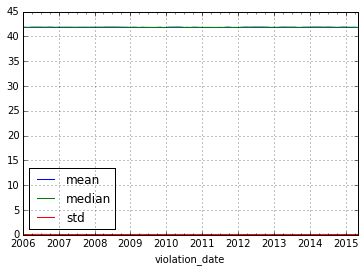

In [9]:
lat.plot()

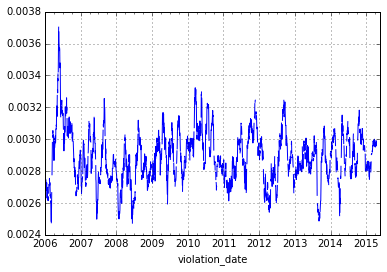

In [10]:
latitude_change = df.latitude.pct_change()
std_change = pd.rolling_std(latitude_change, 390)
std_change.resample('D').plot()

##some_plots

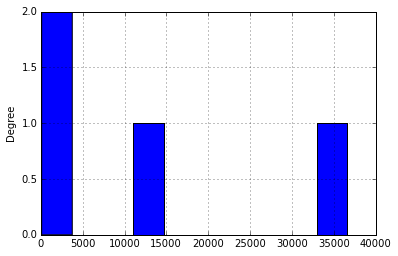

In [11]:
df.inspection_category.value_counts().plot(kind='hist')

/Users/jkatzsamuels/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


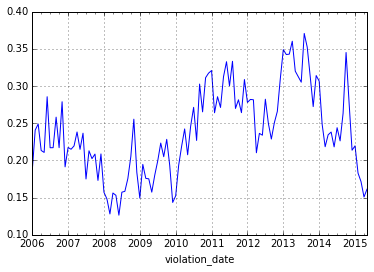

In [12]:
#failure rate by month
df['passed'] = (df['inspection_status'] != "FAILED")
df.passed.resample('M', kind = 'mean').plot()

In [13]:
df['passed_complaint'] = (df['inspection_category'] == 'COMPLAINT') & (df['passed'] == True)
df['passed_periodic'] = (df['inspection_category'] == 'PERIODIC') & (df['passed'] == True)
df['passed_permit'] = (df['inspection_category'] == 'PERMIT') & (df['passed'] == True)
df['passed_registration'] = (df['inspection_category'] == 'REGISTRATION') & (df['passed'] == True)


/Users/jkatzsamuels/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/jkatzsamuels/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/jkatzsamuels/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

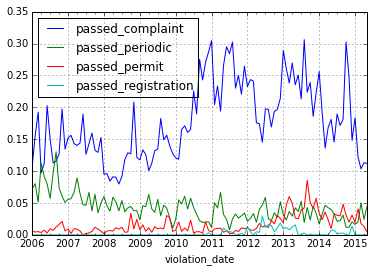

In [14]:
df[['passed_complaint', 'passed_periodic', 'passed_permit', 'passed_registration']].resample('M', kind = 'mean').plot()


In [15]:
df[['passed_complaint', 'passed_periodic', 'passed_permit', 'passed_registration']].head()

               passed_complaint passed_periodic passed_permit  \
violation_date                                                  
2015-05-21                False           False         False   
2015-05-21                False           False         False   
2015-05-21                False           False         False   
2015-05-21                False           False         False   
2015-05-21                False           False         False   

               passed_registration  
violation_date                      
2015-05-21                   False  
2015-05-21                   False  
2015-05-21                   False  
2015-05-21                   False  
2015-05-21                   False  

In [16]:
inspector_counts = df[['inspector_id', 'id']].groupby('inspector_id').count()
inspector_counts=inspector_counts.rename(columns={'inspector_id' : 'inspector_id', 'id' : 'inspector_count'})
inspector_counts.reset_index(level=0,inplace=True) #reset index for merge later
inspector_counts.head()

  inspector_id  inspector_count
0       007786                3
1       010227               76
2       010277               30
3       018050               23
4       025526               37

In [17]:
#merge datasets
df.reset_index(level='0', inplace=True)
df1 = pd.merge(df,inspector_counts,on='inspector_id')
df1.index = df1.pop('violation_date')
df1.head()

                     id violation_code violation_status  \
violation_date                                            
2015-05-21      5063843       CN065014             OPEN   
2015-05-20      5063146       CN074014             OPEN   
2015-05-19      5061236       CN105085             OPEN   
2015-05-15      5059194       CN063014             OPEN   
2015-05-15      5059281       CN070014             OPEN   

                         violation_description violation_location  \
violation_date                                                      
2015-05-21                      REPAIR LINTELS     OTHER   :    :   
2015-05-20      SERVICE WALK, PASSAGE, AREAWAY     OTHER   :    :   
2015-05-19       PROVIDE DEADLOCK FOR ENTRANCE     OTHER   :    :   
2015-05-15                             CHIMNEY     OTHER   :    :   
2015-05-15               REPAIR EXTERIOR STAIR     OTHER   :    :   

                                     violation_inspector_comments  \
violation_date                   

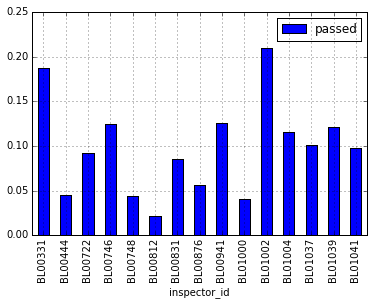

In [18]:
#only consider inspectors with certain violations
df2 = df1[df1.inspector_count > .4 * df1.inspector_count.max()]
#pass rates per inspector
df2[['inspector_id', 'passed']].groupby(['inspector_id']).mean().plot(kind='bar')

##Bounding Box

In [19]:
max_lat = df['latitude'].max()
min_lat = df['latitude'].min()
max_lon = df['longitude'].max()
min_lon = df['longitude'].min()

n = 3
x = np.linspace(min_lat, max_lat,n)
y = np.linspace(min_lon, max_lon,n)

df['box'] = np.zeros(df.shape[0])
        

/Users/jkatzsamuels/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
# box_counter = 0 #counter for box
# rows = range(df.shape[0])
# for i in range(len(x)):
#     for j in range(len(y)):
#         box_counter += 1 #increment
#         xco1 = x[i]
#         xco2 = x[i+1]
#         yco1 = y[j]
#         yco2 = y[j+1]
#         new_rows = []
#         for k in rows:
#             lat = df.iloc[k]['latitude']
#             lon = df.iloc[k]['longitude']
#             if (xco1 <= lat) & (lat <= xco2) & (yco1 <= lon) & (lon <= yco2):
# #                 print "Something in " + str(box_counter)
#                 df.iloc[k]['box'] = box_counter
# #                 print k
#             else:
#                 new_rows.append(k)
#         rows = new_rows
                

                

            

In [21]:
df['box'].unique()

array([ 0.])

##Text Features

In [110]:
import nltk
from nltk.corpus import stopwords
stop = [str(item) for item in stopwords.words('english')]

In [118]:
df1['comments_filtered'] = df1['violation_inspector_comments'].str.replace(';','').str.replace(',','').str.lower().str.split()

df2 = pd.DataFrame(df1[['comments_filtered', 'id']])




# [str(s) for s in stopwords.words('english')]

In [119]:
df2 = df2.dropna(how='any')
df2.shape

(44661, 2)

In [120]:
#remove stop words
df2['comments_filtered'] = df2['comments_filtered'].apply(lambda x : [item for item in x if item not in stop])

In [122]:
#create bigrams
from nltk.util import bigrams

df2['bigrams'] = df2['comments_filtered'].apply( lambda x : list(bigrams(x)))

In [123]:
df2['bigrams'].head()

0                                 [(lintels, rusted.)]
1    [(service, walk), (walk, broken), (broken, con...
2    [(front, exterior), (exterior, door), (door, l...
3                   [(chimney, open), (open, joints.)]
4    [(east, basement), (basement, exterior), (exte...
Name: bigrams, dtype: object

In [124]:
#compute description length without stop words
df2['description_length'] = df2['comments_filtered'].apply(lambda x : len(x))
df2['description_length'].head()

0    2
1    4
2    4
3    3
4    8
Name: description_length, dtype: int64

In [125]:
#merge text features into original dataframe
df1.reset_index(level=0,inplace=True)
df3 = pd.merge(df1,df2,on='id')


In [126]:
df3.head()

   index violation_date       id violation_code violation_status  \
0      0     2015-05-21  5063843       CN065014             OPEN   
1      1     2015-05-20  5063146       CN074014             OPEN   
2      2     2015-05-19  5061236       CN105085             OPEN   
3      3     2015-05-15  5059194       CN063014             OPEN   
4      4     2015-05-15  5059281       CN070014             OPEN   

            violation_description violation_location  \
0                  REPAIR LINTELS     OTHER   :    :   
1  SERVICE WALK, PASSAGE, AREAWAY     OTHER   :    :   
2   PROVIDE DEADLOCK FOR ENTRANCE     OTHER   :    :   
3                         CHIMNEY     OTHER   :    :   
4           REPAIR EXTERIOR STAIR     OTHER   :    :   

                        violation_inspector_comments  \
0                                   LINTELS; RUSTED.   
1                     SERVICE WALK; BROKEN CONCRETE.   
2                      FRONT EXTERIOR DOOR; NO LOCK.   
3                             